## libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Data

In [31]:
import pandas as pd

file_path = r"M:\LAST YEAR\anacodaa\Jupyter\machine 2\DATA.csv"
df = pd.read_csv(file_path)


# Data exploration

In [32]:
print(df.head())

  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic   
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT  \
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView   
0        F   Father           15                16                  2  \
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction   
0          20                   Yes                     Go

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [34]:
print(df.describe())

       raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000


In [35]:
# Check for missing values
print(df.isnull().sum())

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [36]:
df.duplicated().sum()

2

In [37]:
df = df.drop_duplicates()

print(df.head())

  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic   
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT  \
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView   
0        F   Father           15                16                  2  \
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction   
0          20                   Yes                     Go

In [38]:
# Explore unique values in categorical column
print(df['Class'].unique())
print(df['gender'].unique())
print(df['Topic'].unique())

['M' 'L' 'H']
['M' 'F']
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']


In [39]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [40]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [41]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [42]:
df = df.dropna()

print(df.head())

   gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic   
0       1            4             4        2        1          0      7  \
1       1            4             4        2        1          0      7   
2       1            4             4        2        1          0      7   
3       1            4             4        2        1          0      7   
4       1            4             4        2        1          0      7   

   Semester  Relation  raisedhands  VisITedResources  AnnouncementsView   
0         0         0           15                16                  2  \
1         0         0           20                20                  3   
2         0         0           10                 7                  0   
3         0         0           30                25                  5   
4         0         0           40                50                 12   

   Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction   
0          20             

In [43]:
df.dtypes

gender                      int32
NationalITy                 int32
PlaceofBirth                int32
StageID                     int32
GradeID                     int32
SectionID                   int32
Topic                       int32
Semester                    int32
Relation                    int32
raisedhands                 int64
VisITedResources            int64
AnnouncementsView           int64
Discussion                  int64
ParentAnsweringSurvey       int32
ParentschoolSatisfaction    int32
StudentAbsenceDays          int32
Class                       int32
dtype: object

# Data Visualization

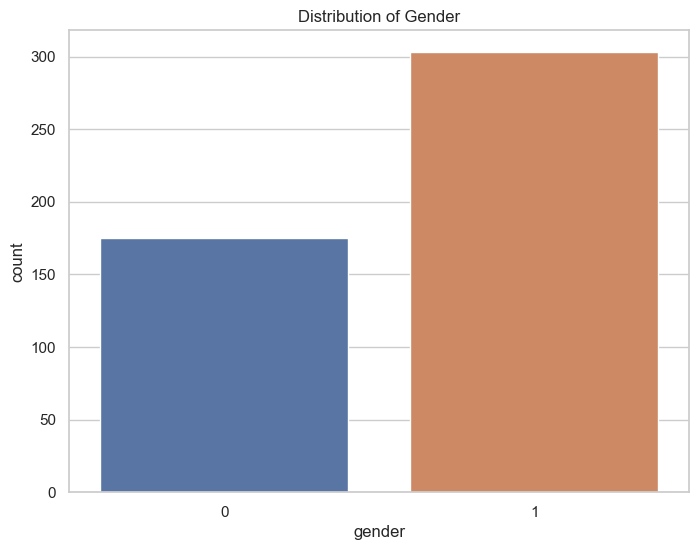

In [44]:
# Set the style for seaborn plots
sns.set(style="whitegrid")


# Count plot for 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.show()

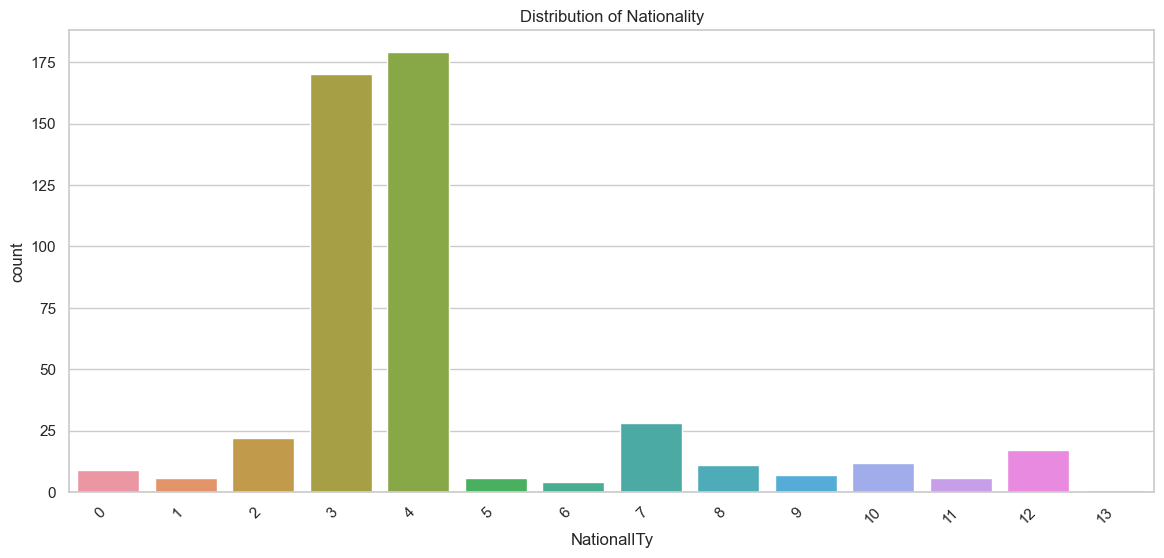

In [45]:
# Count plot for 'NationalITy'
plt.figure(figsize=(14, 6))
sns.countplot(x='NationalITy', data=df)
plt.title('Distribution of Nationality')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

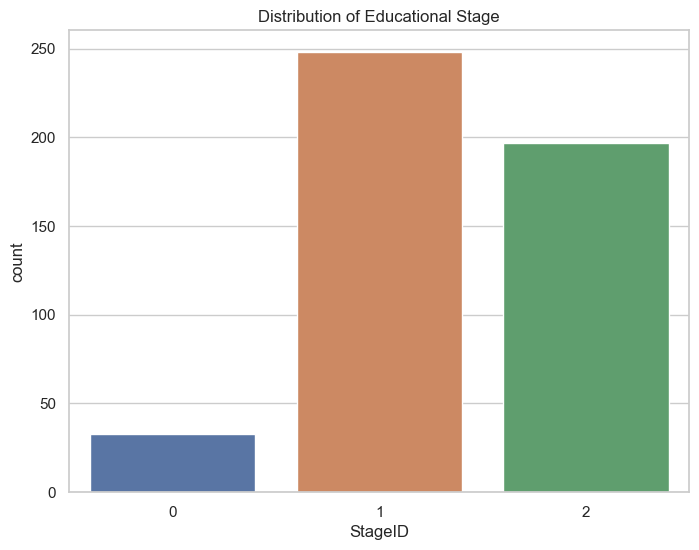

In [46]:
# Count plot for 'StageID'
plt.figure(figsize=(8, 6))
sns.countplot(x='StageID', data=df)
plt.title('Distribution of Educational Stage')
plt.show()

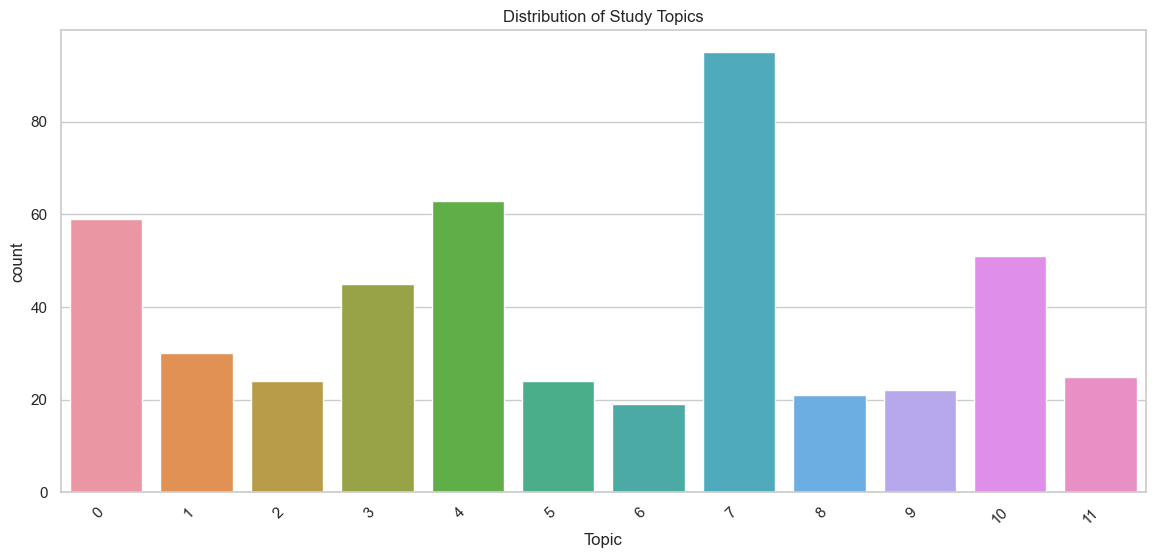

In [47]:
# Count plot for 'Topic'
plt.figure(figsize=(14, 6))
sns.countplot(x='Topic', data=df)
plt.title('Distribution of Study Topics')
plt.xticks(rotation=45, ha='right')
plt.show()

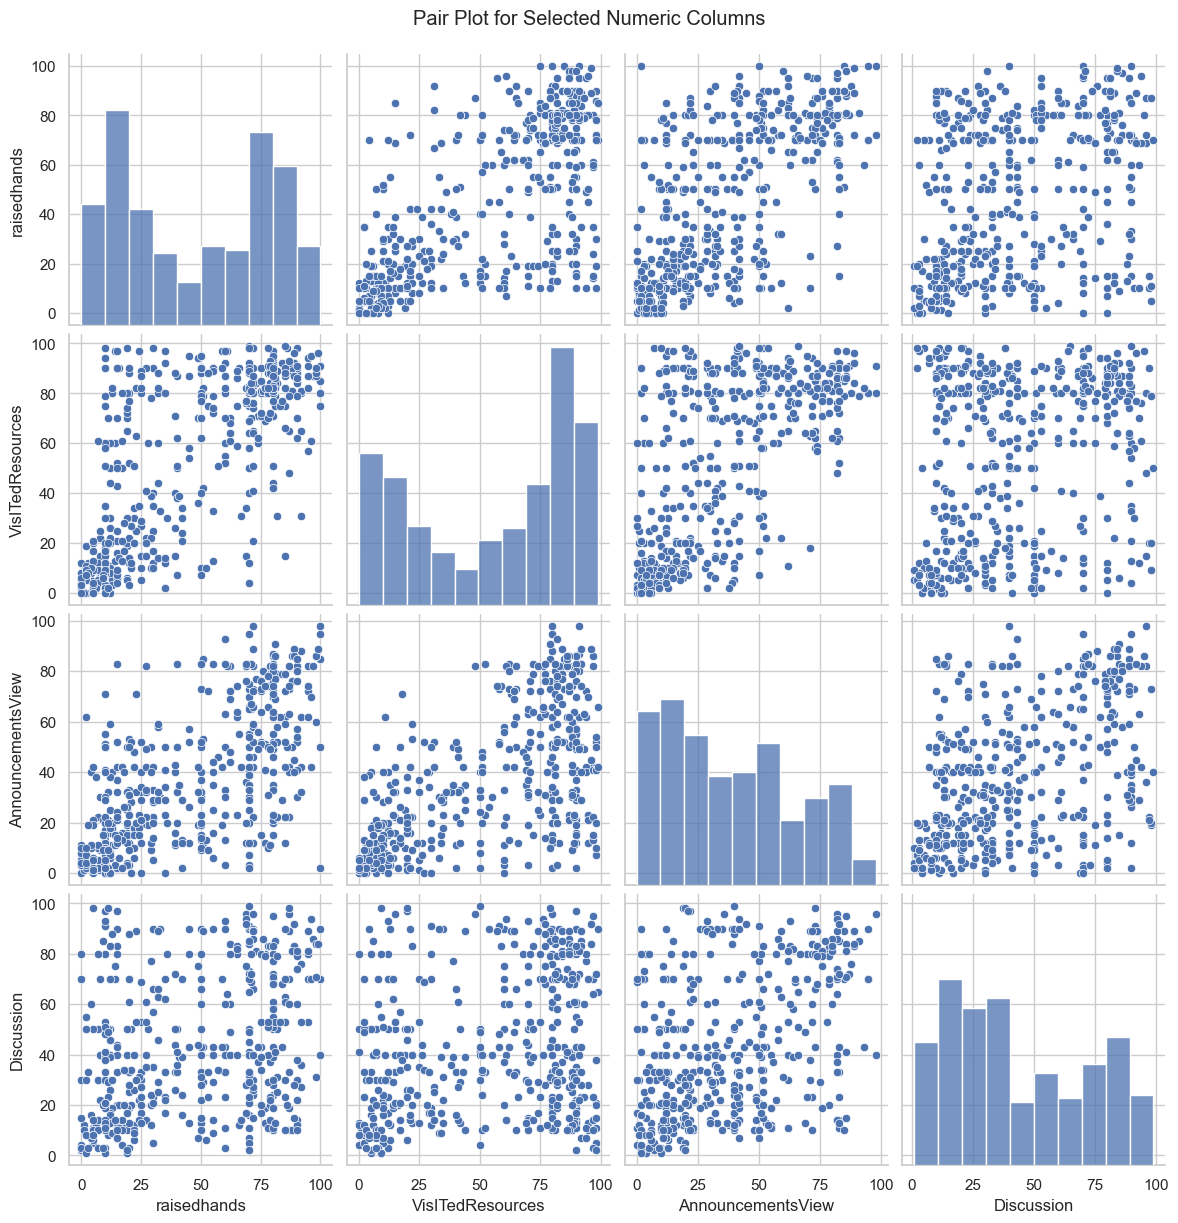

In [48]:
# Pair plot for selected numeric columns
selected_numeric_columns = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
sns.pairplot(df[selected_numeric_columns], height=3)
plt.suptitle('Pair Plot for Selected Numeric Columns', y=1.02)
plt.show()

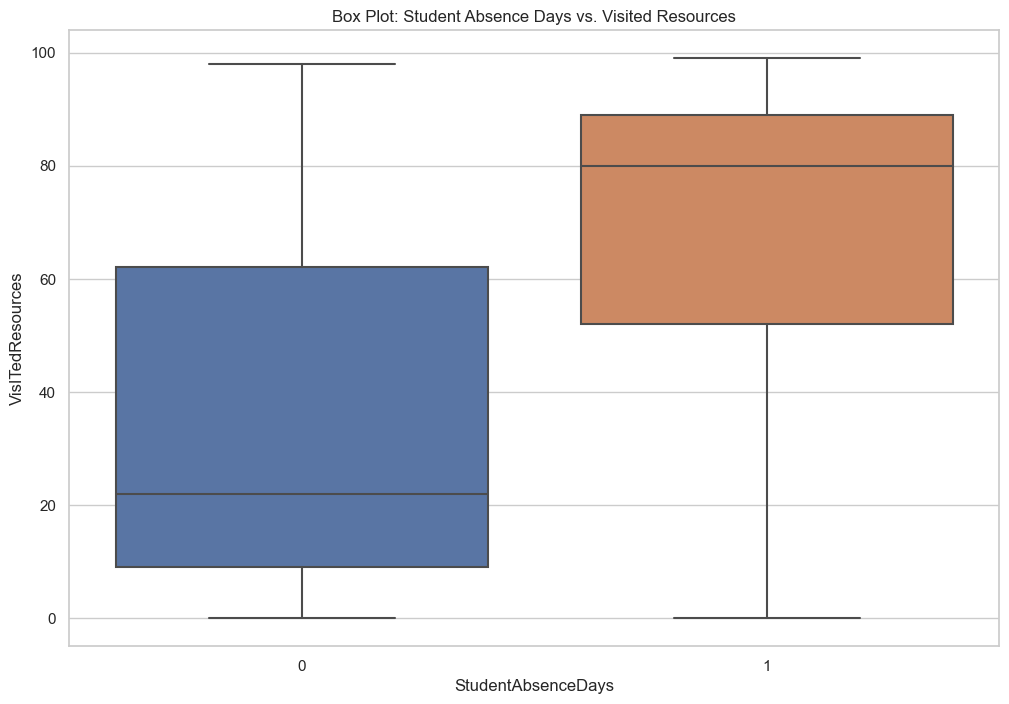

In [49]:
# Box plot for 'StudentAbsenceDays' vs. 'VisITedResources'
plt.figure(figsize=(12, 8))
sns.boxplot(x='StudentAbsenceDays', y='VisITedResources', data=df)
plt.title('Box Plot: Student Absence Days vs. Visited Resources')
plt.show()

# Models

In [104]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Assuming X contains features and y contains the target 'class'
X = df.drop(columns=['Class'])
y = df['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for different models
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing
    ('clf', LogisticRegression(solver='lbfgs', penalty='l2'))  # Logistic Regression model with 'l2' penalty
])

decision_tree_pipeline = Pipeline([
    # Preprocessing if needed,
    ('clf', DecisionTreeClassifier())  # Decision Tree model
])

random_forest_pipeline = Pipeline([
    # Preprocessing if needed,
    ('clf', RandomForestClassifier())  # Random Forest model
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing
    ('clf', SVC())  # Support Vector Machines (SVM) model
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing
    ('clf', KNeighborsClassifier())  # K-Nearest Neighbors (KNN) model
])

gradient_boosting_pipeline = Pipeline([
    # Preprocessing if needed,
    ('clf', GradientBoostingClassifier())  # Gradient Boosting model
])

# Define hyperparameters grid for each model
param_grids = [
    {
        'clf__C': [0.1, 1.0, 10.0],
        'clf__penalty': ['l2']
    },
    {
        'clf__max_depth': [None, 5, 10, 15],
        'clf__min_samples_split': [2, 5, 10]
    },
    {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [None, 5, 10],
        'clf__min_samples_split': [2, 5, 10]
    },
    {
        'clf__C': [0.1, 1.0, 10.0],
        'clf__kernel': ['linear', 'rbf']
    },
    {
        'clf__n_neighbors': [3, 5, 7],
        'clf__weights': ['uniform', 'distance']
    },
    {
        'clf__n_estimators': [100, 200, 300],
        'clf__learning_rate': [0.05, 0.1, 0.3]
    }
]

pipelines = [logistic_pipeline, decision_tree_pipeline, random_forest_pipeline, svm_pipeline, knn_pipeline, gradient_boosting_pipeline]

# Perform GridSearchCV for hyperparameter tuning for each model
best_models = []
for pipeline, param_grid in zip(pipelines, param_grids):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

# Evaluate the best models
model_names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Support Vector Machines",
    "K-Nearest Neighbors",
    "Gradient Boosting"
]

accuracies = []
for model in best_models:
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

# Print accuracies with model names
for model_name, accuracy in zip(model_names, accuracies):
    print(f"{model_name} Accuracy: {accuracy*100:.2f}%")


Logistic Regression Accuracy: 79.17%
Decision Tree Accuracy: 72.92%
Random Forest Accuracy: 83.33%
Support Vector Machines Accuracy: 84.38%
K-Nearest Neighbors Accuracy: 80.21%
Gradient Boosting Accuracy: 79.17%
